<a href="https://colab.research.google.com/github/andrejobbs/Analyze_Bovespa_Banks/blob/main/Analises_Bancos_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Primeira Etapa

In [2]:
!pip install yfinance

In [3]:
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 13.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import plotly.express as px
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
plt.style.use('ggplot')
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

In [5]:
start = datetime(2019, 1, 1)

In [6]:
bbas3 = wb.get_data_yahoo("BBAS3.SA", start = start)
bbdc4 = wb.get_data_yahoo("BBDC4.SA", start = start)
iutb4 = wb.get_data_yahoo("ITUB4.SA", start = start)
sanb11 = wb.get_data_yahoo("SANB11.SA", start = start)
bpac11 = wb.get_data_yahoo("BPAC11.SA", start = start)
bidi11 = wb.get_data_yahoo("BIDI11.SA", start = start)

##Segunda etapa

##BANCO BRASIL

In [7]:
bbas3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       783 non-null    float64
 1   Low        783 non-null    float64
 2   Open       783 non-null    float64
 3   Close      783 non-null    float64
 4   Volume     783 non-null    float64
 5   Adj Close  783 non-null    float64
dtypes: float64(6)
memory usage: 42.8 KB


In [8]:
bbas3.describe()

,High,Low,Open,Close,Volume,Adj Close
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,38.946960,37.804547,38.402222,38.337088,1.531945e+07,34.836408
std,8.935777,8.824184,8.898891,8.902914,7.897251e+06,6.729150
min,25.000000,21.910000,24.200001,22.129999,3.897500e+06,20.023373
25%,31.075000,30.145000,30.515000,30.600000,1.002715e+07,29.163682
50%,34.720001,33.700001,34.200001,34.160000,1.370810e+07,31.944225
75%,48.795000,47.525000,48.129999,48.010000,1.866385e+07,41.707973
max,55.910000,54.820000,55.599998,55.180000,1.020361e+08,48.002705


In [9]:
bbas3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,49.700001,46.090000,46.200001,48.599998,14905300.0,40.703743
2019-01-03,49.200001,47.849998,48.500000,48.799999,8879100.0,40.871262
2019-01-04,49.830002,47.919998,48.080002,48.799999,8859200.0,40.871262
2019-01-07,49.470001,48.169998,48.830002,48.480000,9393500.0,40.603249
2019-01-08,49.049999,46.830002,48.599998,47.930000,14517300.0,40.142612


In [10]:
bbas3.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-21,36.230000,34.970001,36.139999,35.279999,12054400.0,35.279999
2022-02-22,36.110001,35.369999,35.400002,35.610001,29850400.0,35.610001
2022-02-23,36.119999,35.610001,35.799999,35.790001,13340300.0,35.790001
2022-02-24,35.099998,34.090000,34.630001,34.650002,23380700.0,34.650002
2022-02-25,35.169998,34.529999,34.709999,34.860001,9651200.0,34.860001


In [11]:
bbas3[bbas3['Close']==bbas3['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-04,55.18,54.68,54.790001,55.18,9167100.0,47.974083


In [12]:
bbas3[bbas3['Close']==bbas3['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-23,25.0,21.91,25.0,22.129999,26808100.0,20.023373


Por meio desses dados podemos extrair varias informações relevantes como: Informações de fechamento do banco do Brasil entre maximas e minimas podemos analisar que em 04/07/2019 o valor estava na maxima que era de 55.18 e em 23/03/2020 chegou na minima que foi de 22.13, no dia de hoje a ação possui o valor de 33.59.

##BANCO BRADESCO

In [13]:
bbdc4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       783 non-null    float64
 1   Low        783 non-null    float64
 2   Open       783 non-null    float64
 3   Close      783 non-null    float64
 4   Volume     783 non-null    float64
 5   Adj Close  783 non-null    float64
dtypes: float64(6)
memory usage: 42.8 KB


In [14]:
bbdc4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,25.790404,25.053050,25.444342,25.410305,3.746847e+07,23.505302
std,5.471054,5.455029,5.473321,5.488626,2.107891e+07,4.273851
min,15.918181,14.645454,15.154545,15.409090,8.201050e+06,14.402200
25%,20.880909,20.166818,20.568181,20.515000,2.177038e+07,19.963933
50%,24.260000,23.629999,23.945454,23.918180,3.359818e+07,22.930000
75%,31.445454,30.622726,30.968182,31.068182,4.715930e+07,27.487460
max,36.309090,35.472729,36.000000,35.827271,2.058063e+08,31.719425


In [15]:
bbdc4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,30.901514,29.106060,29.280302,30.598484,30783060.0,26.543949
2019-01-03,30.977272,30.181818,30.530302,30.893938,25728780.0,26.811703
2019-01-04,31.265150,30.303030,30.643938,30.651514,19676844.0,26.601311
2019-01-07,31.280302,30.568180,30.568180,31.015150,25256748.0,26.916901
2019-01-08,31.212120,30.295454,31.098484,31.204544,28039440.0,27.081264


In [16]:
bbdc4.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-21,21.350000,20.900000,21.309999,21.059999,20857800.0,21.059999
2022-02-22,21.350000,20.860001,21.209999,20.980000,40427300.0,20.980000
2022-02-23,21.200001,20.840000,21.000000,20.879999,24121200.0,20.879999
2022-02-24,20.469999,19.750000,20.299999,20.250000,71889600.0,20.250000
2022-02-25,20.440001,20.059999,20.150000,20.230000,22376600.0,20.230000


In [17]:
bbdc4[bbdc4['Close']==bbdc4['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-05,35.954544,35.145454,35.409088,35.827271,14274260.0,31.319792


In [18]:
bbdc4[bbdc4['Close']==bbdc4['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-13,15.918181,15.1,15.70909,15.40909,59125550.0,14.4022


Por meio desses dados podemos extrair varias informações relevantes como: Informações de fechamento do banco do Bradesco entre maximas e minimas podemos analisar que em 05/07/2019  o valor estava na maxima que era de 35.83 e em 13/05/2020 chegou na minima que foi de 15.14, no dia de hoje a ação possui o valor de 21.75.

##BANCO ITAU

In [19]:
iutb4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       783 non-null    float64
 1   Low        783 non-null    float64
 2   Open       783 non-null    float64
 3   Close      783 non-null    float64
 4   Volume     783 non-null    float64
 5   Adj Close  783 non-null    float64
dtypes: float64(6)
memory usage: 42.8 KB


In [20]:
iutb4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,30.164572,29.318863,29.749464,29.719553,3.271281e+07,28.286332
std,4.952439,4.975768,4.974970,4.981830,1.655392e+07,4.177444
min,21.309999,20.000000,21.170000,20.520000,7.774500e+06,19.579987
25%,25.730000,24.740000,25.260000,25.285000,2.068095e+07,24.575334
50%,29.790001,29.080000,29.480000,29.530001,2.945750e+07,28.757442
75%,34.650000,33.840000,34.309999,34.240002,4.091385e+07,32.060211
max,39.790001,38.400002,38.669998,39.689999,1.606699e+08,35.739025


In [21]:
iutb4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,37.139999,35.349998,35.439999,37.000000,25581700.0,33.075687
2019-01-03,37.610001,36.450001,36.750000,37.610001,21938600.0,33.620983
2019-01-04,37.709999,36.750000,37.220001,36.980000,24873500.0,33.057812
2019-01-07,37.500000,36.750000,36.799999,37.049999,16901100.0,33.120384
2019-01-08,37.570000,36.560001,37.180000,37.520000,19556300.0,33.540535


In [22]:
iutb4.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-21,26.280001,25.230000,26.230000,25.530001,22419500.0,25.516340
2022-02-22,26.139999,25.490000,25.750000,25.750000,30290000.0,25.750000
2022-02-23,26.080000,25.330000,25.770000,25.389999,22512000.0,25.389999
2022-02-24,25.129999,24.340000,24.750000,24.959999,44033200.0,24.959999
2022-02-25,25.500000,24.809999,24.870001,25.230000,23704800.0,25.230000


In [23]:
iutb4[iutb4['Close']==iutb4['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-04,39.790001,38.400002,38.669998,39.689999,17686500.0,35.494099


In [24]:
iutb4[iutb4['Close']==iutb4['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-23,22.49,20.0,22.26,20.52,53457900.0,19.579987


Por meio desses dados podemos extrair varias informações relevantes como: Informações de fechamento do banco do Itau entre maximas e minimas podemos analisar que em 04/02/2019  o valor estava na maxima que era de 36.68 e em 23/03/2020 chegou na minima que foi de 20.52, no dia de hoje a ação possui o valor de 23.77.

##BANCO SANTANDER

In [25]:
sanb11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       783 non-null    float64
 1   Low        783 non-null    float64
 2   Open       783 non-null    float64
 3   Close      783 non-null    float64
 4   Volume     783 non-null    float64
 5   Adj Close  783 non-null    float64
dtypes: float64(6)
memory usage: 42.8 KB


In [26]:
sanb11.describe()

,High,Low,Open,Close,Volume,Adj Close
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,39.307178,38.128391,38.706373,38.688991,2.200667e+06,34.330343
std,6.925530,6.939458,6.919301,6.950496,1.216615e+06,5.434041
min,23.879999,21.870001,22.700001,22.959999,4.830000e+05,20.423653
25%,32.664999,31.639999,32.070000,32.059999,1.335750e+06,30.934594
50%,40.980000,39.840000,40.380001,40.459999,1.951700e+06,36.197350
75%,45.140001,44.049999,44.650002,44.580002,2.770950e+06,38.162268
max,51.549999,50.509998,50.520000,51.040001,9.487900e+06,43.105255


In [27]:
sanb11.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,46.160000,42.759998,42.759998,45.740002,4418100.0,36.933998
2019-01-03,47.279999,45.520000,45.639999,47.250000,2849100.0,38.153294
2019-01-04,48.000000,46.599998,47.060001,47.200001,2238900.0,38.112923
2019-01-07,48.160000,47.299999,47.389999,47.990002,2230400.0,38.750828
2019-01-08,47.290001,45.509998,47.230000,46.360001,1544400.0,38.465370


In [28]:
sanb11.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-21,31.969999,31.480000,31.879999,31.570000,1083700.0,31.570000
2022-02-22,32.040001,31.520000,32.040001,31.719999,1251300.0,31.719999
2022-02-23,32.220001,31.350000,31.379999,31.530001,3443800.0,31.530001
2022-02-24,30.809999,29.700001,30.620001,30.260000,3510900.0,30.260000
2022-02-25,30.860001,30.030001,30.030001,30.650000,2464800.0,30.650000


In [29]:
sanb11[sanb11['Close']==sanb11['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,51.549999,49.82,50.0,51.040001,1752000.0,43.105255


In [30]:
sanb11[sanb11['Close']==sanb11['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-15,24.25,22.959999,23.93,22.959999,2953800.0,20.423653


Por meio desses dados podemos extrair varias informações relevantes como: Informações de fechamento do banco do Santander entre maximas e minimas podemos analisar que em  02/01/2020  o valor estava na maxima que era de 51.04 e em 23/03/2020 chegou na minima que foi de 20.52, no dia de hoje a ação possui o valor de 20.52.

##BANCO PACTUAL

In [31]:
bpac11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       783 non-null    float64
 1   Low        783 non-null    float64
 2   Open       783 non-null    float64
 3   Close      783 non-null    float64
 4   Volume     783 non-null    float64
 5   Adj Close  783 non-null    float64
dtypes: float64(6)
memory usage: 42.8 KB


In [32]:
bpac11.describe()

,High,Low,Open,Close,Volume,Adj Close
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,19.157947,18.387762,18.790817,18.774917,1.126652e+07,18.339483
std,6.834785,6.641288,6.741838,6.727565,7.588753e+06,6.745172
min,6.232500,5.912500,5.912500,6.225000,7.368000e+05,5.773697
25%,13.820000,13.028750,13.518750,13.496250,6.374950e+06,12.985863
50%,19.712500,18.952499,19.222500,19.219999,1.011840e+07,18.662687
75%,23.959999,23.000000,23.445001,23.389999,1.423940e+07,23.152004
max,32.730000,31.520000,32.250000,32.270000,8.639200e+07,31.734743


In [33]:
bpac11.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,6.2325,5.9125,5.9125,6.2250,1463200.0,5.773697
2019-01-03,6.4975,6.1150,6.1600,6.4825,1576000.0,6.012529
2019-01-04,6.7175,6.4600,6.5375,6.7125,736800.0,6.225854
2019-01-07,6.9500,6.7150,6.7500,6.8500,7306800.0,6.353385
2019-01-08,6.7300,6.3900,6.6675,6.5525,2610800.0,6.235074


In [34]:
bpac11.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-21,25.340000,24.040001,25.000000,24.160000,7108100.0,24.160000
2022-02-22,25.500000,24.750000,24.780001,25.450001,8523200.0,25.450001
2022-02-23,26.639999,25.010000,25.540001,25.209999,13235600.0,25.209999
2022-02-24,26.110001,23.860001,24.010000,26.049999,17075600.0,26.049999
2022-02-25,25.959999,25.000000,25.459999,25.410000,8268500.0,25.410000


In [35]:
bpac11[bpac11['Close']==bpac11['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-26,32.73,31.52,31.700001,32.27,8295000.0,31.734743


In [36]:
bpac11[bpac11['Close']==bpac11['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,6.2325,5.9125,5.9125,6.225,1463200.0,5.773697


Por meio desses dados podemos extrair varias informações relevantes como: Informações de fechamento do banco do Pactual entre maximas e minimas podemos analisar que em  26/07/2021  o valor estava na maxima que era de 32.27 e em 02/01/2019 chegou na minima que foi de 6.22, no dia de hoje a ação possui o valor de 21.60.

##BANCO INTER

In [37]:
bidi11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 605 entries, 2019-07-19 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       605 non-null    float64
 1   Low        605 non-null    float64
 2   Open       605 non-null    float64
 3   Close      605 non-null    float64
 4   Volume     605 non-null    float64
 5   Adj Close  605 non-null    float64
dtypes: float64(6)
memory usage: 33.1 KB


In [38]:
bidi11.describe()

,High,Low,Open,Close,Volume,Adj Close
count,605.000000,605.000000,605.000000,605.000000,6.050000e+02,605.000000
mean,33.711492,31.765629,32.771333,32.681613,3.748375e+06,32.627892
std,22.280426,21.038929,21.677343,21.595732,3.498089e+06,21.621136
min,8.183526,6.598114,7.990346,8.163542,3.776980e+05,8.122658
25%,16.493334,15.687591,16.053967,15.980692,1.562100e+06,15.900659
50%,20.950094,19.947554,20.473333,20.410521,2.793107e+06,20.302412
75%,52.119999,48.820000,50.810001,50.820000,4.716900e+06,50.784351
max,86.769997,83.129997,84.889999,85.279999,4.623444e+07,85.242653


In [39]:
bidi11.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-19,14.621767,13.889013,14.455232,14.218752,2793107.0,14.064089
2019-07-22,14.764987,13.755785,14.458563,14.388618,1840454.0,14.232108
2019-07-23,14.302020,13.789092,14.302020,14.188776,1700243.0,14.034441
2019-07-24,14.401941,13.889013,14.138816,14.265382,1560333.0,14.110214
2019-07-25,14.322004,13.982273,14.288697,14.155469,1204552.0,14.001496


In [40]:
bidi11.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-20,30.850000,28.750000,29.500000,28.799999,6410500.0,28.799999
2021-12-21,29.750000,27.799999,29.600000,28.000000,10970200.0,28.000000
2021-12-22,29.540001,27.799999,28.500000,28.580000,10234300.0,28.580000
2021-12-23,29.320000,27.830000,28.740000,28.650000,4367600.0,28.650000
2022-02-25,21.080000,19.730000,20.639999,20.190001,17527700.0,20.190001


In [41]:
bidi11[bidi11['Close']==bidi11['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-21,86.769997,83.129997,83.300003,85.279999,3469000.0,85.242653


In [42]:
bidi11[bidi11['Close']==bidi11['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-12,8.183526,6.661397,7.993677,8.163542,8977995.0,8.122658


Por meio desses dados podemos extrair varias informações relevantes como: Informações de fechamento do banco do Inter entre maximas e minimas podemos analisar que em  21/07/2021  o valor estava na maxima que era de 85.27 e em 12/03/2020 chegou na minima que foi de 8.16, no dia de hoje a ação possui o valor de 34.77.

**CONSIDERAÇÃO FINAL** #PODEMOS ANALISAR QUE AS ACÕES DO BANCO SANTANDER E ITAU TIVERAM A MINIMA HISTORICA DE 2019 À 2021 NA DATA 12/03/2020 DEVIDO A PANDEMIA DA COVID-19.

**DICIONARIO E EXPLICAÇÃO DAS COLUNAS**
##Open:ABERTURA- MOMENTO EM QUE A BOLSA ABRE AS NEGOCIAÇÕES.
##High:ALTA- MOMENTO EM QUE SE TEM SCORE POSITIVO REFERENTE A AÇÃO.
##Low:BAIXA- MOMENTO EM QUE SE TEM SCORE NEGATIVO REFERENTE A AÇÃO.
##Close:FECHAMENTO- MOMENTO EM QUE A BOLSA FECHA AS NEGOCIAÇÕES
##AdjClose:VALOR DO FECHAMENTO AJUSTADO- PREÇO DE FECHAMENTO AJUSTADO PARA DIVISÕES E DISTRIBUIÇÕES DE DIVIDENDOS E/ OU GANHOS DE CAPITAL.
##Volume:VOLUME- QUANTIDADE DE NEGOCIAÇÕES DE COMPRA E VENDA FEITAS EM RELAÇÃO A UM ATIVO EM UM DETERMINADO ESPAÇÕ DE TEMPO.

#Renomeando as colunas para português.

In [43]:
bbas3.rename(columns = {"Open":"Abertura"}, inplace=True)
bbas3.rename(columns = {"High":"Alta"}, inplace=True)
bbas3.rename(columns = {"Low":"Baixa"}, inplace=True)
bbas3.rename(columns = {"Close":"Fechamento"}, inplace=True)
bbas3.rename(columns = {"Adj Close":"valorFechamentoAjustado"}, inplace=True)
bbas3.rename(columns = {"Volume":"Volume"}, inplace=True)


In [44]:
bbas3.describe()

,Alta,Baixa,Abertura,Fechamento,Volume,valorFechamentoAjustado
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,38.946960,37.804547,38.402222,38.337088,1.531945e+07,34.836408
std,8.935777,8.824184,8.898891,8.902914,7.897251e+06,6.729150
min,25.000000,21.910000,24.200001,22.129999,3.897500e+06,20.023373
25%,31.075000,30.145000,30.515000,30.600000,1.002715e+07,29.163682
50%,34.720001,33.700001,34.200001,34.160000,1.370810e+07,31.944225
75%,48.795000,47.525000,48.129999,48.010000,1.866385e+07,41.707973
max,55.910000,54.820000,55.599998,55.180000,1.020361e+08,48.002705


In [45]:
bbdc4.rename(columns = {"Open":"Abertura"}, inplace=True)
bbdc4.rename(columns = {"High":"Alta"}, inplace=True)
bbdc4.rename(columns = {"Low":"Baixa"}, inplace=True)
bbdc4.rename(columns = {"Close":"Fechamento"}, inplace=True)
bbdc4.rename(columns = {"Adj Close":"valorFechamentoAjustado"}, inplace=True)
bbdc4.rename(columns = {"Volume":"Volume"}, inplace=True)


In [46]:
bbdc4.describe()

,Alta,Baixa,Abertura,Fechamento,Volume,valorFechamentoAjustado
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,25.790404,25.053050,25.444342,25.410305,3.746847e+07,23.505302
std,5.471054,5.455029,5.473321,5.488626,2.107891e+07,4.273851
min,15.918181,14.645454,15.154545,15.409090,8.201050e+06,14.402200
25%,20.880909,20.166818,20.568181,20.515000,2.177038e+07,19.963933
50%,24.260000,23.629999,23.945454,23.918180,3.359818e+07,22.930000
75%,31.445454,30.622726,30.968182,31.068182,4.715930e+07,27.487460
max,36.309090,35.472729,36.000000,35.827271,2.058063e+08,31.719425


In [47]:
iutb4.rename(columns = {"Open":"Abertura"}, inplace=True)
iutb4.rename(columns = {"High":"Alta"}, inplace=True)
iutb4.rename(columns = {"Low":"Baixa"}, inplace=True)
iutb4.rename(columns = {"Close":"Fechamento"}, inplace=True)
iutb4.rename(columns = {"Adj Close":"valorFechamentoAjustado"}, inplace=True)
iutb4.rename(columns = {"Volume":"Volume"}, inplace=True)

In [48]:
iutb4.describe()

,Alta,Baixa,Abertura,Fechamento,Volume,valorFechamentoAjustado
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,30.164572,29.318863,29.749464,29.719553,3.271281e+07,28.286332
std,4.952439,4.975768,4.974970,4.981830,1.655392e+07,4.177444
min,21.309999,20.000000,21.170000,20.520000,7.774500e+06,19.579987
25%,25.730000,24.740000,25.260000,25.285000,2.068095e+07,24.575334
50%,29.790001,29.080000,29.480000,29.530001,2.945750e+07,28.757442
75%,34.650000,33.840000,34.309999,34.240002,4.091385e+07,32.060211
max,39.790001,38.400002,38.669998,39.689999,1.606699e+08,35.739025


In [49]:
sanb11.rename(columns = {"Open":"Abertura"}, inplace=True)
sanb11.rename(columns = {"High":"Alta"}, inplace=True)
sanb11.rename(columns = {"Low":"Baixa"}, inplace=True)
sanb11.rename(columns = {"Close":"Fechamento"}, inplace=True)
sanb11.rename(columns = {"Adj Close":"valorFechamentoAjustado"}, inplace=True)
sanb11.rename(columns = {"Volume":"Volume"}, inplace=True)

In [50]:
sanb11.describe()

,Alta,Baixa,Abertura,Fechamento,Volume,valorFechamentoAjustado
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,39.307178,38.128391,38.706373,38.688991,2.200667e+06,34.330343
std,6.925530,6.939458,6.919301,6.950496,1.216615e+06,5.434041
min,23.879999,21.870001,22.700001,22.959999,4.830000e+05,20.423653
25%,32.664999,31.639999,32.070000,32.059999,1.335750e+06,30.934594
50%,40.980000,39.840000,40.380001,40.459999,1.951700e+06,36.197350
75%,45.140001,44.049999,44.650002,44.580002,2.770950e+06,38.162268
max,51.549999,50.509998,50.520000,51.040001,9.487900e+06,43.105255


In [51]:
bpac11.rename(columns = {"Open":"Abertura"}, inplace=True)
bpac11.rename(columns = {"High":"Alta"}, inplace=True)
bpac11.rename(columns = {"Low":"Baixa"}, inplace=True)
bpac11.rename(columns = {"Close":"Fechamento"}, inplace=True)
bpac11.rename(columns = {"Adj Close":"valorFechamentoAjustado"}, inplace=True)
bpac11.rename(columns = {"Volume":"Volume"}, inplace=True)

In [52]:
bpac11.describe()

,Alta,Baixa,Abertura,Fechamento,Volume,valorFechamentoAjustado
count,783.000000,783.000000,783.000000,783.000000,7.830000e+02,783.000000
mean,19.157947,18.387762,18.790817,18.774917,1.126652e+07,18.339483
std,6.834785,6.641288,6.741838,6.727565,7.588753e+06,6.745172
min,6.232500,5.912500,5.912500,6.225000,7.368000e+05,5.773697
25%,13.820000,13.028750,13.518750,13.496250,6.374950e+06,12.985863
50%,19.712500,18.952499,19.222500,19.219999,1.011840e+07,18.662687
75%,23.959999,23.000000,23.445001,23.389999,1.423940e+07,23.152004
max,32.730000,31.520000,32.250000,32.270000,8.639200e+07,31.734743


In [53]:
bidi11.rename(columns = {"Open":"Abertura"}, inplace=True)
bidi11.rename(columns = {"High":"Alta"}, inplace=True)
bidi11.rename(columns = {"Low":"Baixa"}, inplace=True)
bidi11.rename(columns = {"Close":"Fechamento"}, inplace=True)
bidi11.rename(columns = {"Adj Close":"valorFechamentoAjustado"}, inplace=True)
bidi11.rename(columns = {"Volume":"Volume"}, inplace=True)

In [54]:
bidi11.describe()

,Alta,Baixa,Abertura,Fechamento,Volume,valorFechamentoAjustado
count,605.000000,605.000000,605.000000,605.000000,6.050000e+02,605.000000
mean,33.711492,31.765629,32.771333,32.681613,3.748375e+06,32.627892
std,22.280426,21.038929,21.677343,21.595732,3.498089e+06,21.621136
min,8.183526,6.598114,7.990346,8.163542,3.776980e+05,8.122658
25%,16.493334,15.687591,16.053967,15.980692,1.562100e+06,15.900659
50%,20.950094,19.947554,20.473333,20.410521,2.793107e+06,20.302412
75%,52.119999,48.820000,50.810001,50.820000,4.716900e+06,50.784351
max,86.769997,83.129997,84.889999,85.279999,4.623444e+07,85.242653


In [55]:
tickers = ["bbdc4", "bbas3", "iutb4", "sanb11", "bpac11", "bidi11"]

In [56]:
tickers = sorted(tickers)
tickers

['bbas3', 'bbdc4', 'bidi11', 'bpac11', 'iutb4', 'sanb11']

In [57]:
banco = pd.concat([bbas3, bbdc4, bidi11, bpac11, iutb4, sanb11], axis=1, keys=tickers)

In [58]:
banco.head()

bbas3             ...     sanb11                        
                 Alta      Baixa  ...     Volume valorFechamentoAjustado
Date                              ...                                   
2019-01-02  49.700001  46.090000  ...  4418100.0               36.933998
2019-01-03  49.200001  47.849998  ...  2849100.0               38.153294
2019-01-04  49.830002  47.919998  ...  2238900.0               38.112923
2019-01-07  49.470001  48.169998  ...  2230400.0               38.750828
2019-01-08  49.049999  46.830002  ...  1544400.0               38.465370

[5 rows x 36 columns]

In [59]:
banco.tail()

bbas3             ...     sanb11                        
                 Alta      Baixa  ...     Volume valorFechamentoAjustado
Date                              ...                                   
2022-02-21  36.230000  34.970001  ...  1083700.0               31.570000
2022-02-22  36.110001  35.369999  ...  1251300.0               31.719999
2022-02-23  36.119999  35.610001  ...  3443800.0               31.530001
2022-02-24  35.099998  34.090000  ...  3510900.0               30.260000
2022-02-25  35.169998  34.529999  ...  2464800.0               30.650000

[5 rows x 36 columns]

Por meio desse apanhado geral de informações podemos identifcar que as ações do banco do brasil e do santander eram as mais valorizadas em 2019, e nos dias de hoje o banco inter é o que mais teve aumento em suas ações ficando em primeiro lugar dos 6 bancos listados. Porém na data de 1/1/2019 suas ações ainda não estavam listadas na bolsa.


##Terceira etapa

#candlestick mesmo importando varias bibliotecas e vendo varios videos e tuturiais o grafico não aparece

In [60]:
período=bbas3[0:50]
fig = go.Figure(data=[go.Candlestick(x=período.index,
                open=período['Abertura'],
                high=período['Alta'],
                low=período['Baixa'],
                close=período['Fechamento'])])
fig.update_layout(
    title='Candlestick Banco do Brasil',
    yaxis_title='Valor da Ação',
    xaxis_rangeslider_visible=False
    
)
fig.show()

In [61]:
período=bbdc4[0:50]
fig = go.Figure(data=[go.Candlestick(x=período.index,
                open=período['Abertura'],
                high=período['Alta'],
                low=período['Baixa'],
                close=período['Fechamento'])])
fig.update_layout(
    title='Candlestick Bradesco',
    yaxis_title='Valor da Ação',
    xaxis_rangeslider_visible=False
    
)
fig.show()

In [62]:
período=iutb4[0:50]
fig = go.Figure(data=[go.Candlestick(x=período.index,
                open=período['Abertura'],
                high=período['Alta'],
                low=período['Baixa'],
                close=período['Fechamento'])])
fig.update_layout(
    title='Candlestick Itau',
    yaxis_title='Valor da Ação',
    xaxis_rangeslider_visible=False
    
)
fig.show()

In [63]:
período=sanb11[0:50]
fig = go.Figure(data=[go.Candlestick(x=período.index,
                open=período['Abertura'],
                high=período['Alta'],
                low=período['Baixa'],
                close=período['Fechamento'])])
fig.update_layout(
    title='Candlestick Santander',
    yaxis_title='Valor da Ação',
    xaxis_rangeslider_visible=False
    
)
fig.show()

In [64]:
período=bpac11[0:50]
fig = go.Figure(data=[go.Candlestick(x=período.index,
                open=período['Abertura'],
                high=período['Alta'],
                low=período['Baixa'],
                close=período['Fechamento'])])
fig.update_layout(
    title='Candlestick Banco Pactual',
    yaxis_title='Valor da Ação',
    xaxis_rangeslider_visible=False
    
)
fig.show()

In [65]:
período=bidi11[0:50]
fig = go.Figure(data=[go.Candlestick(x=período.index,
                open=período['Abertura'],
                high=período['Alta'],
                low=período['Baixa'],
                close=período['Fechamento'])])
fig.update_layout(
    title='Candlestick Banco Inter',
    yaxis_title='Valor da Ação',
    xaxis_rangeslider_visible=False
    
)
fig.show()

#DISTIBUIÇÃO PREÇO 
#BANCO DO BRASIL ABERTURA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



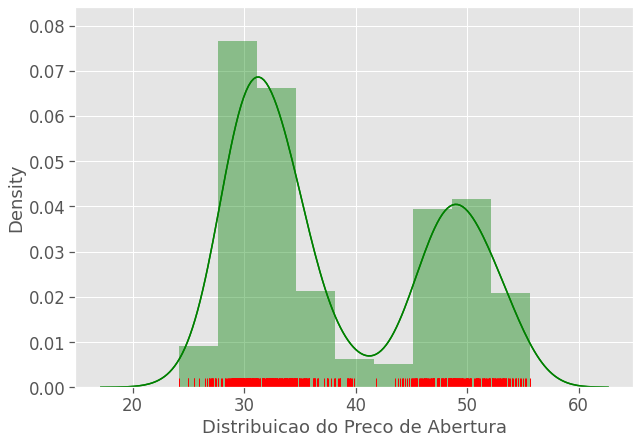

In [66]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bbas3['Abertura'],color='green')
sns.rugplot(bbas3['Abertura'],color='red')
sns.distplot(bbas3['Abertura'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Abertura');

#BANCO DO BRASIL FECHAMENTO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



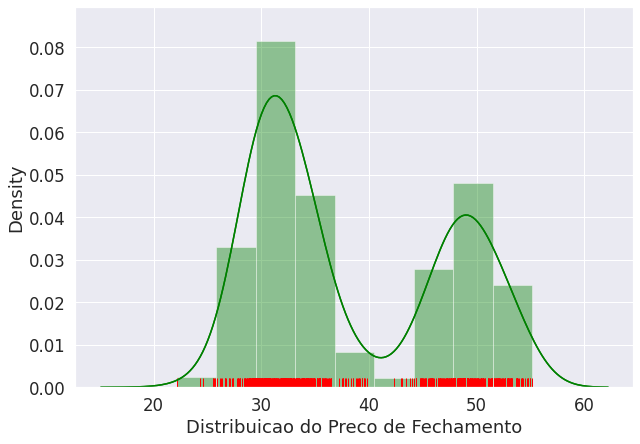

In [67]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bbas3['Fechamento'],color='green')
sns.rugplot(bbas3['Fechamento'],color='red')
sns.distplot(bbas3['Fechamento'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Fechamento');

#BANCO BRADESCO ABERTURA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



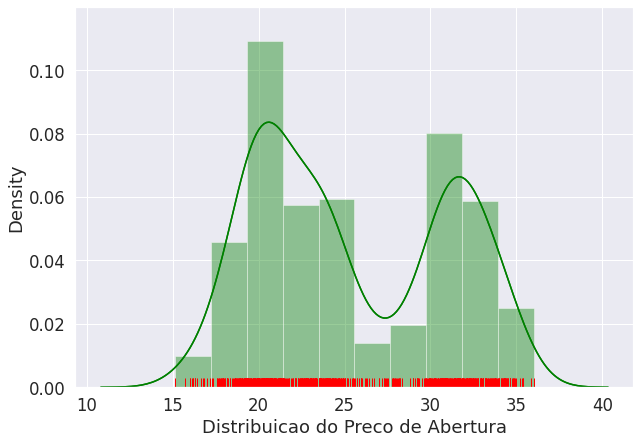

In [68]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bbdc4['Abertura'],color='green')
sns.rugplot(bbdc4['Abertura'],color='red')
sns.distplot(bbdc4['Abertura'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Abertura');

#BANCO BRADESCO FECHAMENTO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



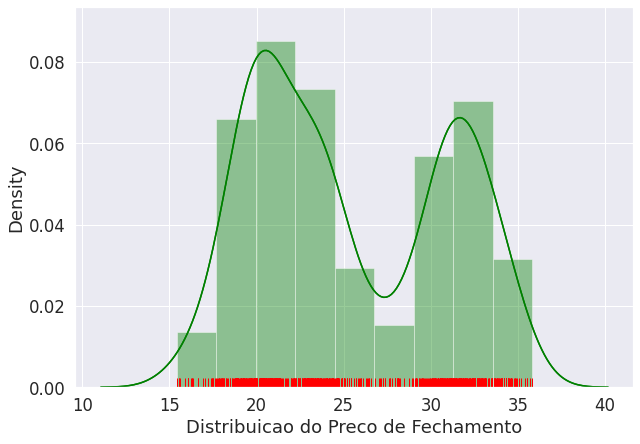

In [69]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bbdc4['Fechamento'],color='green')
sns.rugplot(bbdc4['Fechamento'],color='red')
sns.distplot(bbdc4['Fechamento'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Fechamento');

#BANCO ITAU ABETURA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



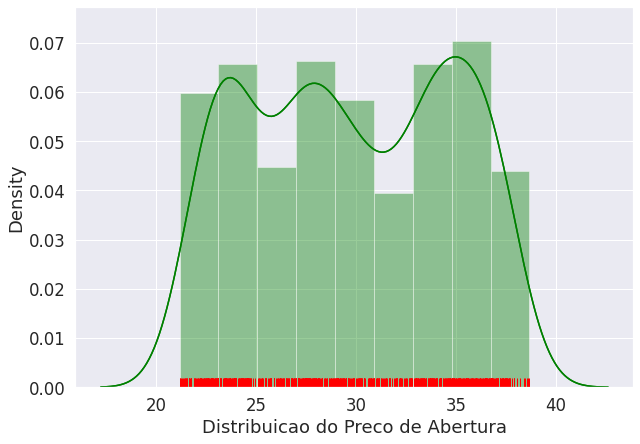

In [70]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(iutb4['Abertura'],color='green')
sns.rugplot(iutb4['Abertura'],color='red')
sns.distplot(iutb4['Abertura'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Abertura');

#BANCO ITAU FECHAMENTO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



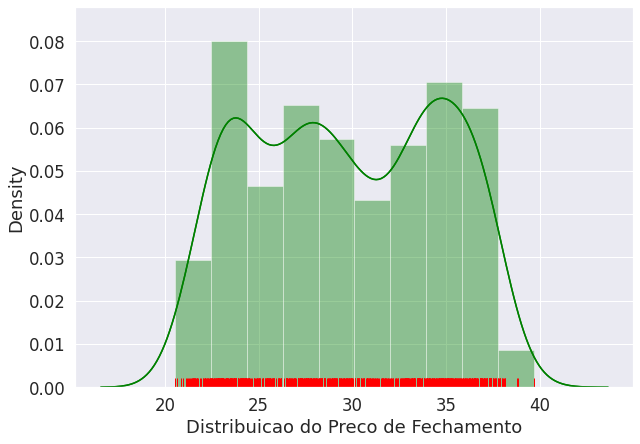

In [71]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(iutb4['Fechamento'],color='green')
sns.rugplot(iutb4['Fechamento'],color='red')
sns.distplot(iutb4['Fechamento'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Fechamento');

#BANCO SANTANDER ABERTURA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



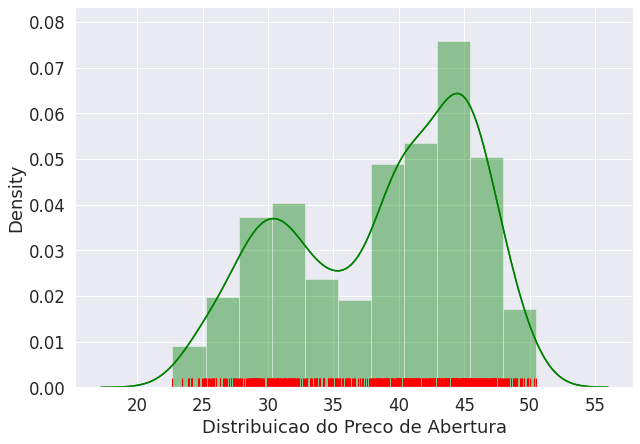

In [72]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(sanb11['Abertura'],color='green')
sns.rugplot(sanb11['Abertura'],color='red')
sns.distplot(sanb11['Abertura'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Abertura');

#BANCO SANTANDER FECHAMENTO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



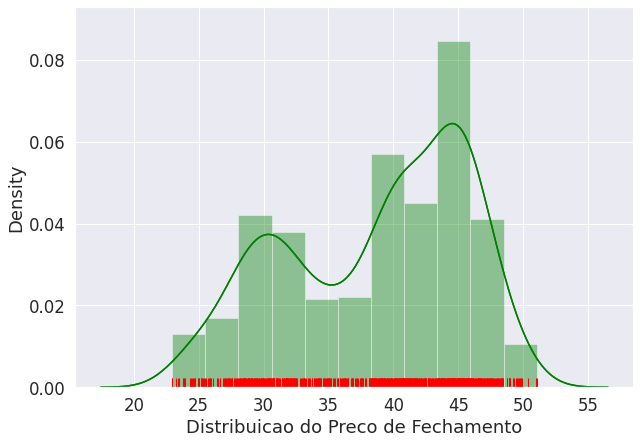

In [73]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(sanb11['Fechamento'],color='green')
sns.rugplot(sanb11['Fechamento'],color='red')
sns.distplot(sanb11['Fechamento'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Fechamento');

#BANCO PACTUAL ABERTURA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



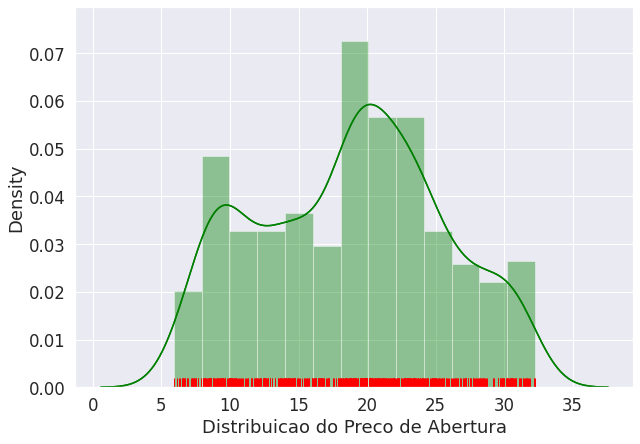

In [74]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bpac11['Abertura'],color='green')
sns.rugplot(bpac11['Abertura'],color='red')
sns.distplot(bpac11['Abertura'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Abertura');

#BANCO PACTUAL FECHAMENTO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



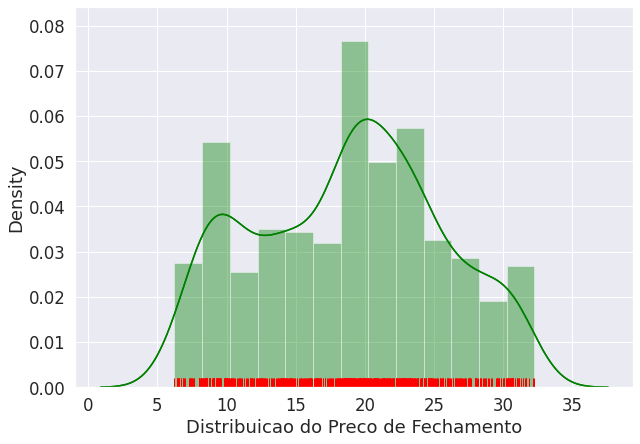

In [75]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bpac11['Fechamento'],color='green')
sns.rugplot(bpac11['Fechamento'],color='red')
sns.distplot(bpac11['Fechamento'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Fechamento');

#BANCO INTER ABERTURA 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



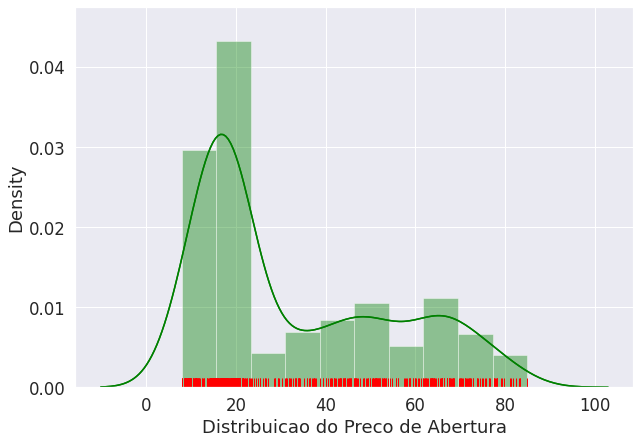

In [76]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bidi11['Abertura'],color='green')
sns.rugplot(bidi11['Abertura'],color='red')
sns.distplot(bidi11['Abertura'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Abertura');

#BANCO INTER FECHAMENTO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



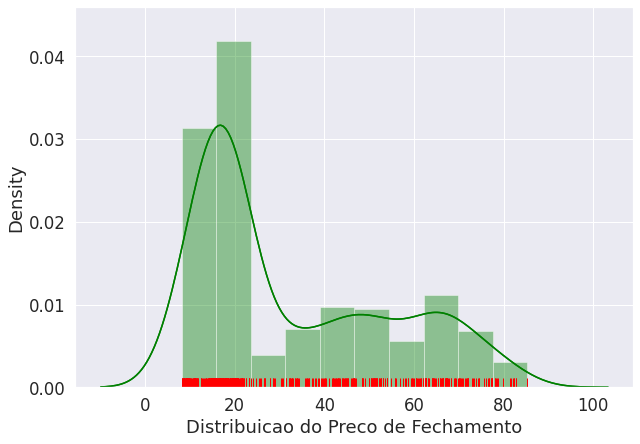

In [77]:
plt.figure(figsize=(10,7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20,
                                               'axes.titlesize':20,
                                               'axes.labelsize':18})
sns.kdeplot(bidi11['Fechamento'],color='green')
sns.rugplot(bidi11['Fechamento'],color='red')
sns.distplot(bidi11['Fechamento'],color='green')
sns.set_style('darkgrid')

plt.xlabel('Distribuicao do Preco de Fechamento');